# **Support Vector Regression (SVR) in R**

## **Importing the dataset**

In [1]:
ds = read.csv('/content/Position_Salaries.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,Position,Level,Salary
,<chr>,<int>,<int>
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000


## **Splitting the dataset into the Train set and Test set**

In [2]:
ds = ds[2:3]

In [3]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Salary, SplitRatio = 9/10)
split

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [4]:
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
print(head(train_set,3))

  Level Salary
1     1  45000
2     2  50000
3     3  60000


In [5]:
print(head(test_set,3))

  Level Salary
5     5 110000


## **Fitting Support Vector Regression to the dataset**

In [6]:
install.packages('e1071')
library (e1071)
regressor = svm(formula = Salary ~., data = train_set, type = "eps-regression")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Predicting a new result**

In [7]:
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

1 
188751.8

## **Predicting the Test set result**

In [8]:
y_pred = predict(regressor, newdata = test_set)
y_pred

5 
129730.2

## **Visualizing the Support Vector Regression results**

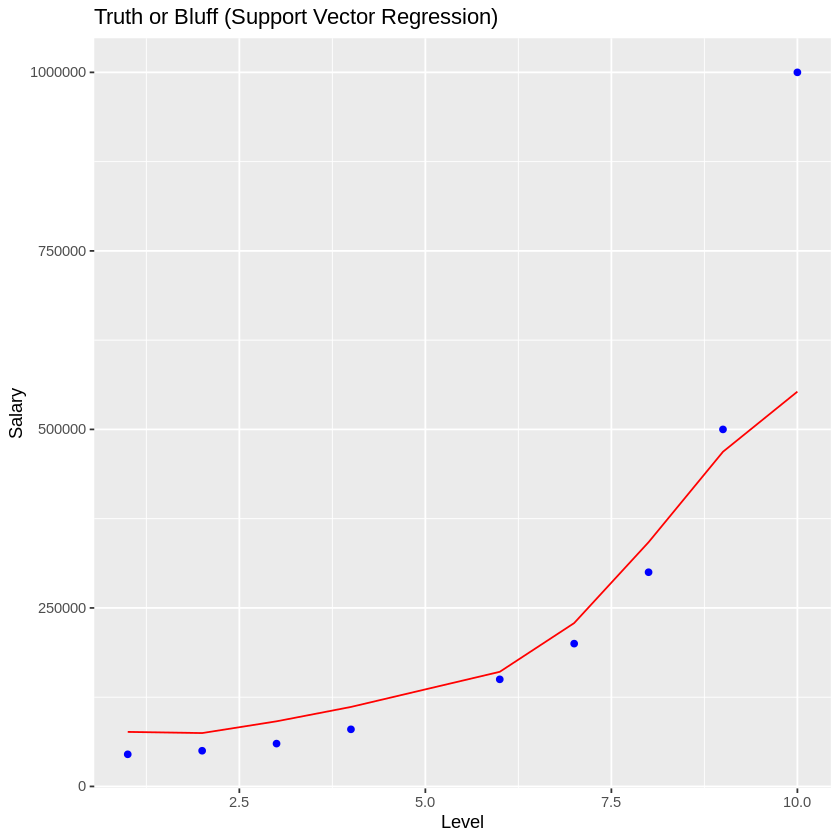

In [9]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'blue') +
  geom_line(aes(x = train_set$Level, y = predict(regressor, newdata =  train_set)),
            colour = 'red') +
  ggtitle('Truth or Bluff (Support Vector Regression)') +
  xlab('Level') +
  ylab('Salary')

## **Visualizing the Support Vector Regression Model results (for higher resolution and smoother curve)**

In [10]:
x_grid = seq(min(train_set$Level), max(train_set$Level), 0.1)
x_grid

[1]  1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4
[16]  2.5  2.6  2.7  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
[31]  4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4
[46]  5.5  5.6  5.7  5.8  5.9  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
[61]  7.0  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4
[76]  8.5  8.6  8.7  8.8  8.9  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9
[91] 10.0

In [11]:
head(data.frame(x_grid))

,x_grid
,<dbl>
1,1.0
2,1.1
3,1.2
4,1.3
5,1.4
6,1.5


In [12]:
y = predict(regressor, newdata =  data.frame(Level = x_grid))

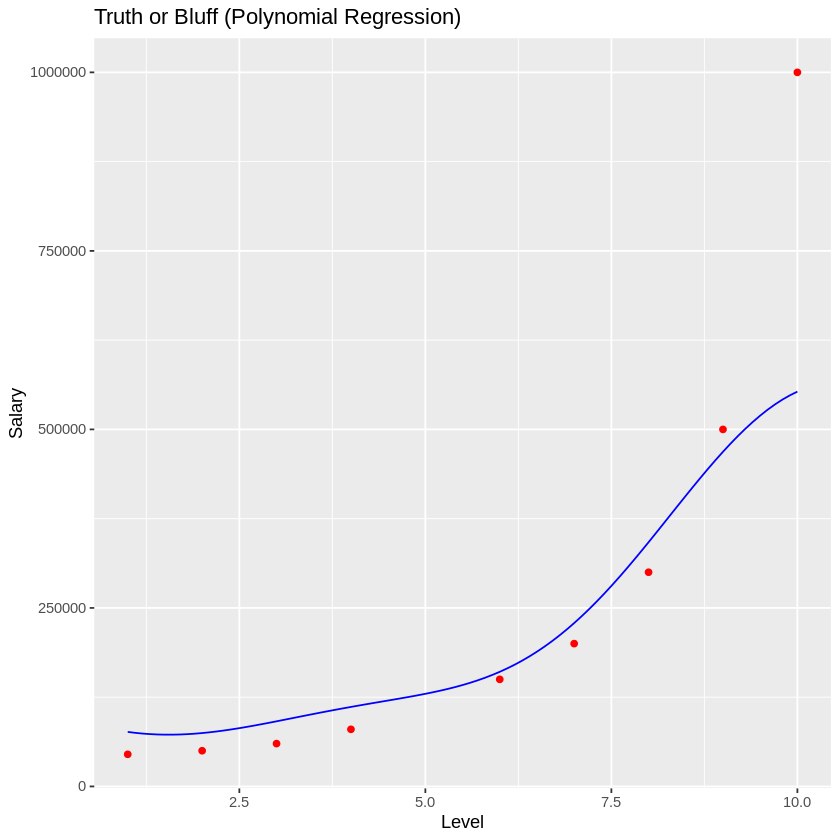

In [13]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(train_set$Level), max(train_set$Level), 0.1)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata =  data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')